In [1]:
# import hierarchical clustering libraries
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\EastWestAirline_new.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
air=data.drop(["ID#","cc2_miles","cc3_miles"],axis=1)
air.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,174,1,0,0,7000,0
1,19244,0,1,215,2,0,0,6968,0
2,41354,0,1,4123,4,0,0,7034,0
3,14776,0,1,500,1,0,0,6952,0
4,97752,0,4,43300,26,2077,4,6935,1


In [4]:
air.isnull().sum()
# No null values

Balance              0
Qual_miles           0
cc1_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(air)
df_norm.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [7]:
kmeans_clust=KMeans(n_clusters=2)
kmeans_clust.fit(df_norm)
kmeans_clust.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [8]:
k = list(range(2,8))
TWSS = []
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
TWSS

[array([1633.78741733]),
 array([1365.83818414]),
 array([1142.03686588]),
 array([972.97935619]),
 array([925.0057577]),
 array([878.15363066])]

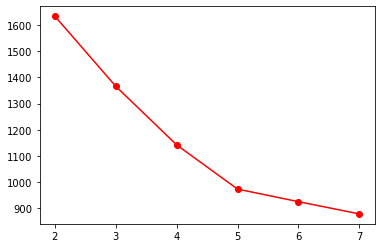

In [9]:
plt.plot(k,TWSS,"ro-")

In [10]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(df_norm)
kmeans_clust.labels_

array([0, 0, 0, ..., 3, 2, 2])

In [11]:
df_norm["clusters"]=pd.Series(kmeans_clust.labels_)

In [12]:
result=air.groupby(df_norm.clusters).mean()
result

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusters,,,,,,,,,
0,49921.633641,89.903226,1.122120,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
1,83529.153046,290.453195,1.156018,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,33097.301357,94.131783,1.070736,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
3,108317.387376,198.336634,3.915842,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
4,118297.325243,73.467638,3.584142,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
